# Dogs Are nice, right??

- Well you'd better have said yes else i HATE you.
* Jk, in this notebook I will be researching some dog breeds and classifying them.

In [2]:
import tensorflow as tf
from tensorflow import keras

train_data = "dogImages/dogImages/train"
test_data = "dogImages/dogImages/test"
val_data = "dogImages/dogImages/valid"

# Load the training data without preprocessing
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(314, 320),
    batch_size=32,
    shuffle=True,
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(314, 320),
    batch_size=32,
    shuffle=True,
)

Found 6680 files belonging to 133 classes.
Using 5344 files for training.
Found 6680 files belonging to 133 classes.
Using 1336 files for validation.


In [4]:
# Checking the classes

class_names = train_dataset.class_names

num_classes = len(class_names)

for class_name in class_names:
    print(class_name)

001.Affenpinscher
002.Afghan_hound
003.Airedale_terrier
004.Akita
005.Alaskan_malamute
006.American_eskimo_dog
007.American_foxhound
008.American_staffordshire_terrier
009.American_water_spaniel
010.Anatolian_shepherd_dog
011.Australian_cattle_dog
012.Australian_shepherd
013.Australian_terrier
014.Basenji
015.Basset_hound
016.Beagle
017.Bearded_collie
018.Beauceron
019.Bedlington_terrier
020.Belgian_malinois
021.Belgian_sheepdog
022.Belgian_tervuren
023.Bernese_mountain_dog
024.Bichon_frise
025.Black_and_tan_coonhound
026.Black_russian_terrier
027.Bloodhound
028.Bluetick_coonhound
029.Border_collie
030.Border_terrier
031.Borzoi
032.Boston_terrier
033.Bouvier_des_flandres
034.Boxer
035.Boykin_spaniel
036.Briard
037.Brittany
038.Brussels_griffon
039.Bull_terrier
040.Bulldog
041.Bullmastiff
042.Cairn_terrier
043.Canaan_dog
044.Cane_corso
045.Cardigan_welsh_corgi
046.Cavalier_king_charles_spaniel
047.Chesapeake_bay_retriever
048.Chihuahua
049.Chinese_crested
050.Chinese_shar-pei
051.Chow_c

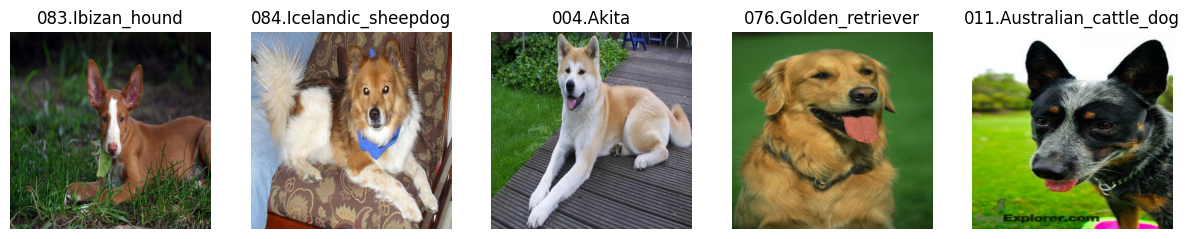

In [5]:
import matplotlib.pyplot as plt

for images, labels in train_dataset.take(1):
    batch_images, batch_labels = images.numpy(), labels.numpy()
    
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(batch_images[i].astype('uint8'))  
    plt.title(class_names[batch_labels[i]])
    plt.axis('off')
plt.show()

In [6]:
from tensorflow.keras import layers

# making the model using 3 layers of convolution and pooling and 2 dense
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(314, 314, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    
    layers.Dense(num_classes, activation='softmax'),
])

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
